# Introduction


### Task: 


#### To Predict whether income exceeds $50K/yr based on census data.

# Attribute Information:



1.)age: continuous.

2.)workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3.)education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

4.)education-num: continuous.

5.)marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

6.)occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

7.)relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

8.)race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

9.)sex: Female, Male.

10.)capital-gain: continuous.

11.)capital-loss: continuous.

12.)hours-per-week: continuous.

13.)native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

14.)fnlwgt: continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

   A. A single cell estimate of the population 16+ for each state.
   B. Controls for Hispanic Origin by age and sex.
   C. Controls by Race, age and sex.

In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [106]:
adult_df = pd.read_csv(r'C:\Users\shreya\Desktop\Ml pro\census - census.csv')
print("Number of Observations in adult dataset:", adult_df.shape)

Number of Observations in adult dataset: (32561, 15)


In [107]:
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [108]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [109]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Exploration and Visualization

In [110]:
#Separate categorical and numberical columns
cat_col = adult_df.dtypes[adult_df.dtypes == 'object']
num_col = adult_df.dtypes[adult_df.dtypes != 'object']

In [111]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           22696  0.697030
Self-emp-not-inc   2541  0.078038
Local-gov          2093  0.064279
?                  1836  0.056386
State-gov          1298  0.039864
Self-emp-inc       1116  0.034274
Federal-gov         960  0.029483
Without-pay          14  0.000430
Never-worked          7  0.000215


--------------------Education-------------------------
              total   percent
HS-grad       10501  0.322502
Some-college   7291  0.223918
Bachelors      5355  0.164461
Masters        1723  0.052916
Assoc-voc      1382  0.042443
11th           1175  0.036086
Assoc-acdm     1067  0.032769
10th            933  0.028654
7th-8th         646  0.019840
Prof-school     576  0.017690
9th             514  0.015786
12th            433  0.013298
Doctorate       413  0.012684
5th-6th         333  0.010227
1st-4th         168  0.005160
Preschool        51  0.001566


--------------------Marital.Status--

### Native.Country, Occupation, Workclass



has unknown values represented by ?


### Education



<ul>
<li>9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately</li>
<li>Create Elementary object for 1st-4th, 5th-6th, 7th-8th</li>
</ul>


### Marital Status



<ul>
<li>Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married</li>
<li>Divorced, separated again comes under category separated.</li>
</ul>


### Workclass



<ul>
<li>Self-emp-not-inc, Self-emp-inc comes under category self employed</li>
<li>Local-gov,State-gov,Federal-gov comes under category goverment emloyees</li>
</ul>

In [112]:
edit_cols = ['native.country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [113]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [114]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

adult_df['education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

In [115]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [116]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()

Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

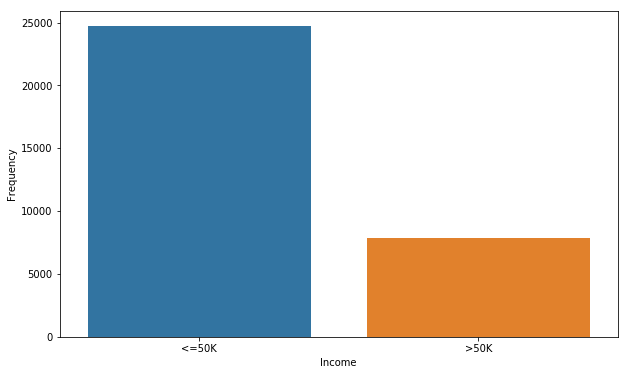

In [117]:
plt.figure(figsize =(10,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 10);
plt.ylabel("Frequency",fontsize = 10);

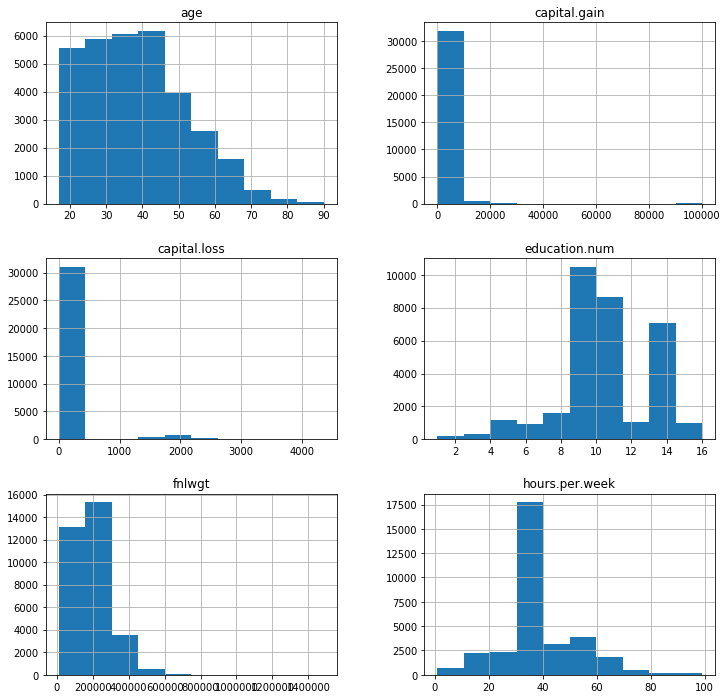

In [118]:
adult_df[list(num_col.index)].hist(figsize = (12,12));

<ul>
    <li>age: In our dataset People from age group of 18 to 50 can be observed.</li>
    <li>hours per week: Generally people can be seen working for 30 hours to 40 hours per week.</li>
    <li>education: people above 8th grade are more in our dataset.</li>
<li>Our dataset is highly skewed and we should consider scaling it for better performance of our models.</li>
    </ul>
Let's explore more for people having capital loss and capital gain greater than zero.

In [119]:
capital_loss_df = adult_df[adult_df['capital.loss']>0]
capital_gain_df = adult_df[adult_df['capital.gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(adult_df.loc[adult_df['capital.gain'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(adult_df.loc[adult_df['capital.loss'] > 0,:].shape[0] / adult_df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [120]:
capital_gain_0= adult_df[adult_df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = adult_df[adult_df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

       capital.loss  capital.gain
11955          1887             0
30749          1887             0
27925          2392             0
26716          1902             0
27732          1980             0
       capital.loss  capital.gain
32198             0         20051
566               0          5013
10896             0         15024
12116             0          4064
25841             0         99999


<ul>
    <li>That means 92% of people are having capital gain equal to zero.</li>
    </ul>
Possibilities for capital gain and capital loss
<ul>
    <li>Both capital gain and capital loss can be zero</li>
    <li>If capital.gain is zero there is possibility of capital loss being high or above zero.</li>
    <li>If capital loss is zero there is possibility of capital.gain being high or above zero.</li>
    </ul>

In [121]:
# Exploring Case when capital.gain and capital loss both are zero. As this category of people are more in our dataset.
print(f"Number of observations having capital gain and capital loss zero: {adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(adult_df[(adult_df['capital.loss'] == 0) & (adult_df['capital.gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
Private           19982
Govt_employees     3714
Self_employed      2960
unknown            1655
Without-pay          12
Never-worked          7
Name: workclass, dtype: int64
================================education=================================
HS-grad              12246
Some-college          6533
Bachelors             4384
Masters               1300
Assoc-voc             1194
elementary_school     1049
Assoc-acdm             930
Prof-school            363
Doctorate              284
Preschool               47
Name: education, dtype: int64
================================marital.status=================================
Married          12603
Never-married     9914
Separated         4934
Widowed            879
Name: marital.status, dtype: int64
================================occupation=================================
Craft-repair   

<ul>
    <li>So 88% of people in our dataset has capital gain and loss = 0</li>
 <li>This concludes capital gain and capital loss are highly skewed features and even have outliers which need to be taken care of.</li>
    <li>Workclass contains unknown values.</li>
    </ul>
Let's find more about capital gain by excluding zero value.

In [122]:
adult_df.loc[adult_df['capital.gain'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,2712.000000,2.712000e+03,2712.000000,2712.000000,2712.0,2712.000000
mean,44.016224,1.880805e+05,11.066003,12938.541298,0.0,43.510324
std,13.268269,1.033775e+05,2.663273,22395.413530,0.0,12.207654
min,17.000000,1.930200e+04,1.000000,114.000000,0.0,1.000000
25%,35.000000,1.180670e+05,9.000000,3411.000000,0.0,40.000000
50%,43.000000,1.759390e+05,10.000000,7298.000000,0.0,40.000000
75%,52.000000,2.364735e+05,13.000000,14084.000000,0.0,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,0.0,99.000000


<ul>
<li>Maximum value of capital gain is 99999 which is far above 75% quartile range.This is definitely an outlier. Lets try and understand more about this maximum value of 99999.</li>
    </ul>

In [123]:
print(f"Number of observations having capital gain of 99999:{adult_df.loc[adult_df['capital.gain'] == 99999,:].shape}")
print(f"Income counts: {adult_df.loc[adult_df['capital.gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(159, 15)
Income counts: >50K    159
Name: income, dtype: int64


<ul>
    <li>Ok,So their income is greater than 50K which is exactly what I expected.</li>
    </ul>

In [124]:
adult_df.loc[adult_df['capital.loss'] > 0,:].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000
mean,41.697828,185492.941409,10.969059,0.0,1871.428571,43.252798
std,12.625609,97621.521906,2.688426,0.0,376.571535,12.247258
min,17.000000,20953.000000,1.000000,0.0,155.000000,1.000000
25%,32.000000,118854.000000,9.000000,0.0,1672.000000,40.000000
50%,41.000000,175109.000000,10.000000,0.0,1887.000000,40.000000
75%,50.000000,228991.500000,13.000000,0.0,1977.000000,50.000000
max,90.000000,816750.000000,16.000000,0.0,4356.000000,99.000000


In [125]:
print(f"Number of observations having capital loss of 4356:{adult_df.loc[adult_df['capital.loss'] == 4356,:].shape}")
print("\nIncome Distribution among people with capital loss above mean:")
print(f"Income counts:\n{adult_df.loc[adult_df['capital.loss'] >= 1871,:]['income'].value_counts()}")

Number of observations having capital loss of 4356:(3, 15)

Income Distribution among people with capital loss above mean:
Income counts:
>50K     658
<=50K    277
Name: income, dtype: int64


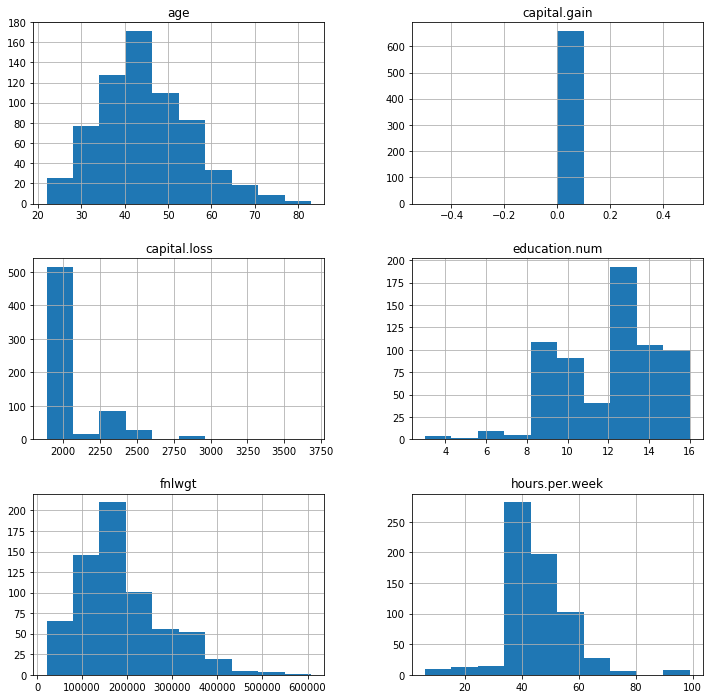

In [126]:
# let's understand characteristics of people having capital loss greater than mean value and having income greater than 50K
adult_df[(adult_df['capital.loss'] >= 1871) & (adult_df['income'] == '>50K')].hist(figsize = (12,12));

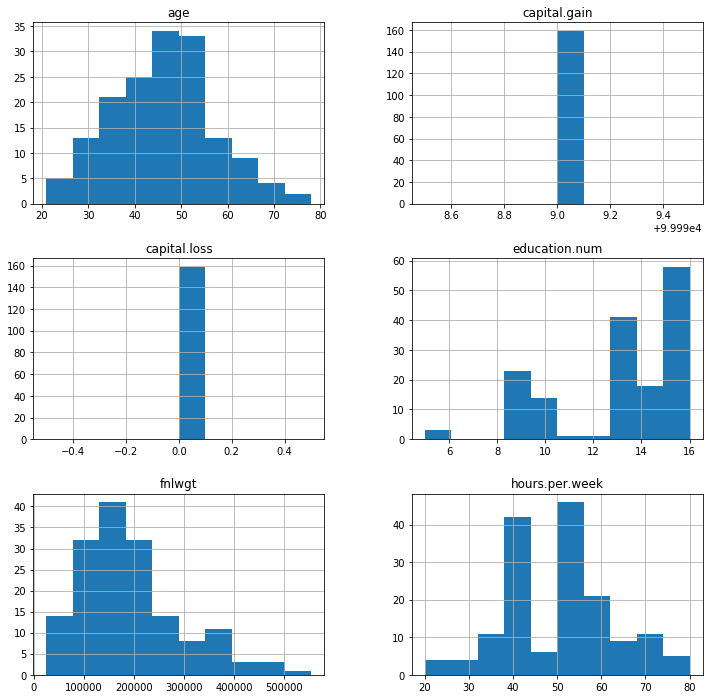

In [127]:
adult_df.loc[adult_df['capital.gain'] == 99999,:].hist(figsize = (12,12));

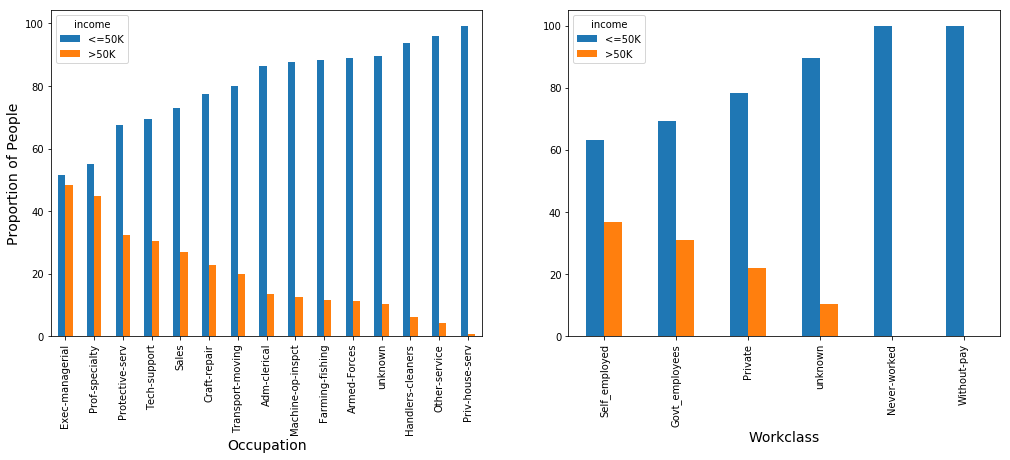

In [128]:
table_occu = pd.crosstab(adult_df['occupation'], adult_df['income'])
table_workclass = pd.crosstab(adult_df['workclass'], adult_df['income'])
table_edu = pd.crosstab(adult_df['education'], adult_df['income'])
table_marital = pd.crosstab(adult_df['marital.status'], adult_df['income'])
table_race = pd.crosstab(adult_df['race'], adult_df['income'])
table_sex = pd.crosstab(adult_df['sex'], adult_df['income'])
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);

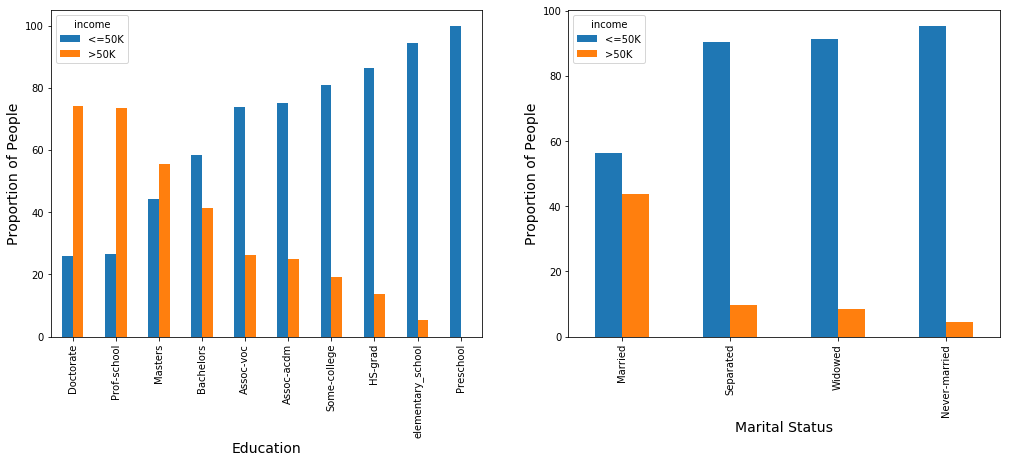

In [129]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

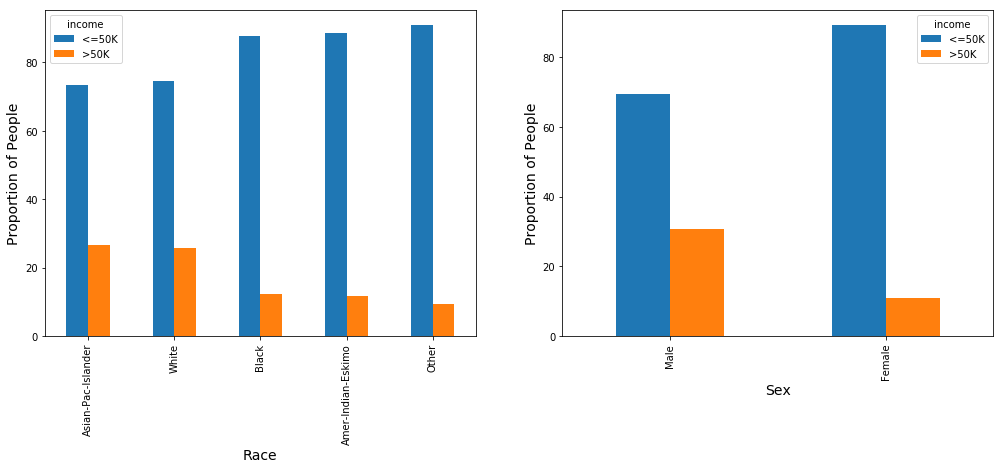

In [130]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

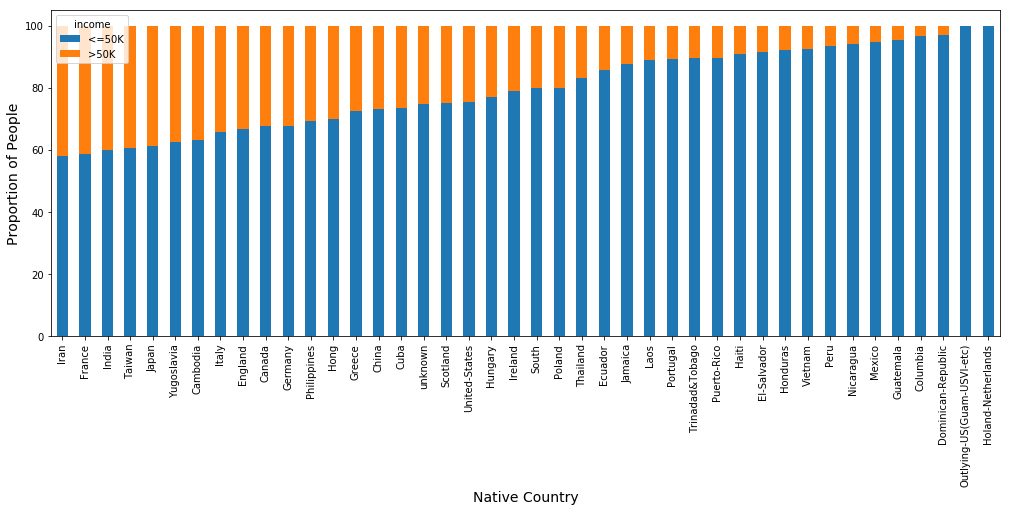

In [131]:
table_country = pd.crosstab(adult_df['native.country'], adult_df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary
<ul>
<ol>Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K</ol>
    <ol>Race:- White and asain-pac-Islander earn salary more than 50K</ol>
    <ol>marital_status :- 41% of married people seem to earn salary greater than 50K.</ol>
    <ol>People having degree doctorate,prof-school,masters are making salary more than 50K.</ol>
    <ol>Out of all the workclass only 59% self employed people are making salary more than 50K.</ol>
    <ol>If I check by occupation, Proportion of people making salary less than 50K is higher.</ol>
    </ul>
Let's find correlation between numerical fetatures

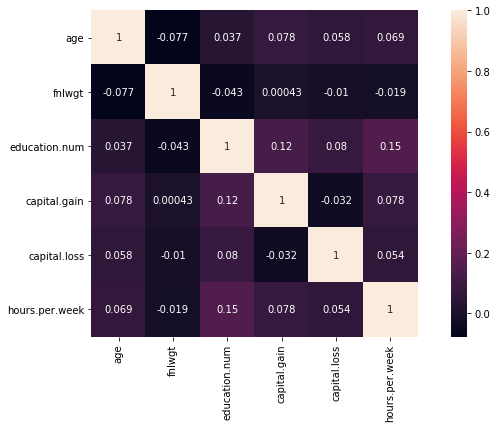

In [132]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(adult_df[list(num_col.index)].corr(),annot=True,square=True);


strong correlation.
<ul>
    <li>Age and Hours per week</li>
    <li>capital gain and hours per week</li>
    </ul>
Moderate Correlation
<ul>
    <li>capital loss and age</li>
    </ul>

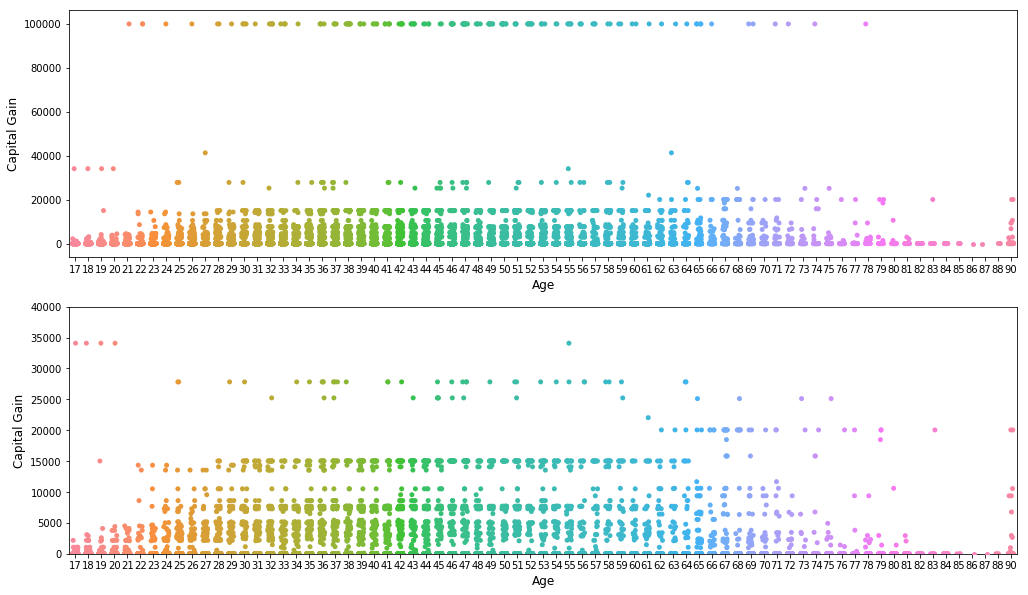

In [133]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital.gain', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

<ul>
<li>Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90</li>
    <li>Age 90 doesn't follow the pattern.</li>
    <li>Capital.gain of 99999 is clearly a outlier let's remove it.</li>
    </ul>

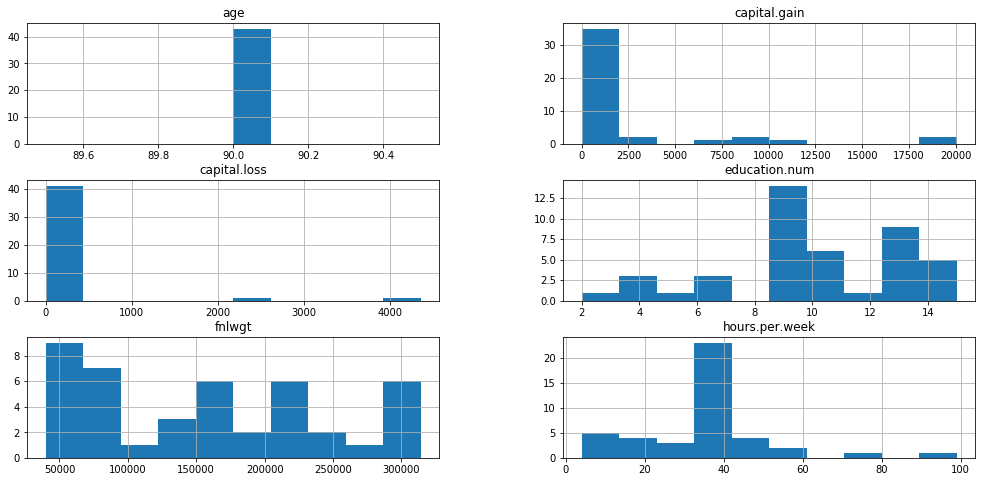

In [134]:
adult_df[adult_df['age'] == 90].hist(figsize = (17,8));


In [135]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(f"======================================={col}=========================")
        print(adult_df[adult_df['age'] == 90][col].value_counts())
    else:
        continue

=======================================workclass=========================
Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: workclass, dtype: int64
=======================================occupation=========================
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Sales                3
Craft-repair         3
Machine-op-inspct    3
Transport-moving     1
Farming-fishing      1
Handlers-cleaners    1
Protective-serv      1
Name: occupation, dtype: int64
=======================================income=========================
<=50K    35
>50K      8
Name: income, dtype: int64


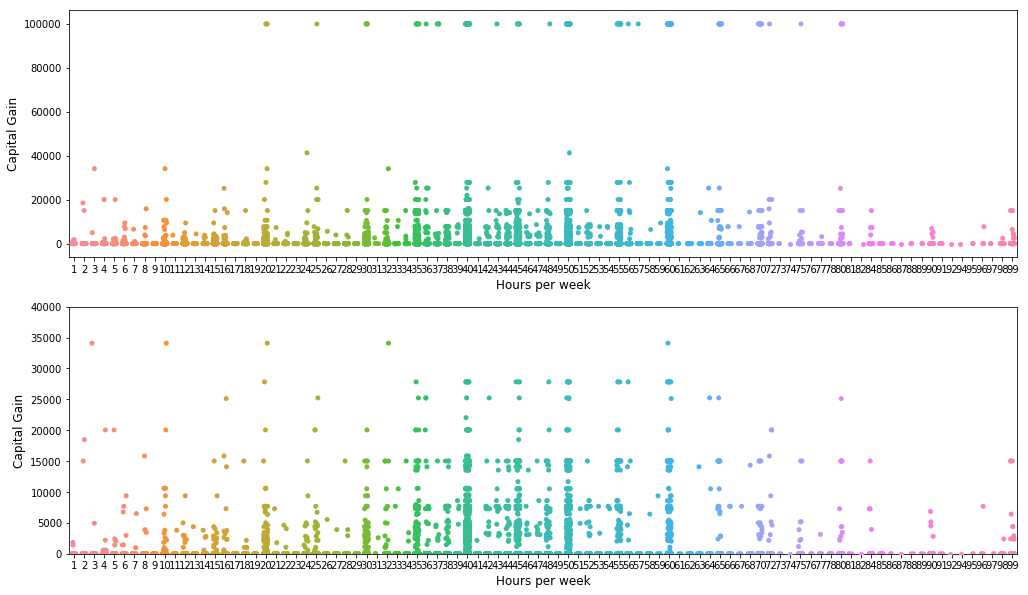

In [136]:

fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('hours.per.week', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('hours.per.week', 'capital.gain', data = adult_df,
         jitter = 0.2,ax = ax);
plt.xlabel('Hours per week',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

<ul>
<li>Majority of people can be seen working for 40,50 and 60 hours per week and capital gain seems to be increasing.</li>
<li>There are few people working for 99 hours per week but doesn't seem to make high capital gain. Conversely people working below 40 hours per week are making high capital gains.</li>
    </ul>

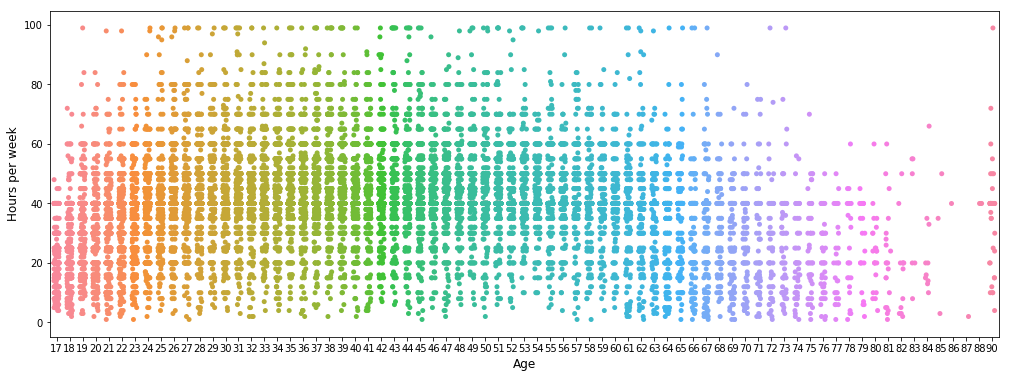

In [137]:
fig = plt.figure(figsize = (17,6))

sns.stripplot('age','hours.per.week', data = adult_df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Hours per week',fontsize = 12);

Outliers Summary
<ul>
<li>Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.</li>
<li>Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is again unreasonable.</li>
<li>Few people working for 99 hours per week.</li>
</ul>
Feature Removal
<ul>
<li>Education num and education are giving similar information</li>
<li>Relationship and marital status imply similar information.Hence keeping only one of the two.</li>
</ul>

## Preparing data for ML Algorithm

In [138]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [139]:
hrs_per_week = adult_df[adult_df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 85


<ul>
<li>It won't be a good idea to delete all the outliers because if that's the case with test data too we might get false results. So I am keeping people working for 99 hourse per week.
</li>
</ul>

In [140]:
# drop rows with age 90
print("Number of observation before removing:",adult_df.shape)
index_age = adult_df[adult_df['age'] == 90].index
adult_df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [141]:
print("Number of observation before removing:",adult_df.shape)
index_gain = adult_df[adult_df['capital.gain'] == 99999].index
adult_df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [142]:

print(f"Number of observations in final dataset: {adult_df.shape}")

Number of observations in final dataset: (32359, 13)


## Train and Fine Tuning on the model

In [143]:
X=adult_df.drop(['income','workclass','education','marital.status','occupation','race','sex','native.country'],axis=1)
print(adult_df.columns)
y=adult_df['income']
#y=adult_df[adult_df['income']=='<=50K'].index
#adult_df.drop(y,inplace=True)
#print(adult_df)

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital.status',
       'occupation', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')


In [144]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB




In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [146]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_gnb = GaussianNB()

In [147]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC',  'Naive']

In [148]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_gnb: 'Naive'}

In [149]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 79.8146%
Null Accuracy: 76.3535%
Confusion Matrix
[[5993  184]
 [1449  464]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 79.8146%
Recall Score: 24.2551%
Specificity Score: 97.0212%
False Positive Rate: 2.9788%
Precision Score: 71.6049%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      6177
        >50K       0.72      0.24      0.36      1913

   micro avg       0.80      0.80      0.80      8090
   macro avg       0.76      0.61      0.62      8090
weighted avg       0.78      0.80      0.76      8090

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTre

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


--------------------------------------------SVC---------------------------------------------------
Accuracy Score for SVC: 76.1063%
Null Accuracy: 76.3535%
Confusion Matrix
[[6113   64]
 [1869   44]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 76.1063%
Recall Score: 2.3001%
Specificity Score: 98.9639%
False Positive Rate: 1.0361%
Precision Score: 40.7407%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

       <=50K       0.77      0.99      0.86      6177
        >50K       0.41      0.02      0.04      1913

   micro avg       0.76      0.76      0.76      8090
   macro avg       0.59      0.51      0.45      8090
weighted avg       0.68      0.76      0.67      8090

--------------------------------------------Naive---------------------------------------------------
Accuracy Score for Naive: 79.2707%
Null Accuracy: 76.3535%
Confusion

In [150]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
LogisticRegression,0.798146
Naive,0.792707
KNN,0.775896
SVC,0.761063
DecisionTree,0.756242
